In [2]:
import numpy as np
from matplotlib import pyplot as plt
from ad_afqmc.lno_afqmc import data_maker

In [10]:
def lno_norhf_data(data):
      new_data = []
      lines = data.splitlines()
      for line in lines:
            columns = line.split()
            if len(columns)>1:
                  if not line.startswith("#"): 
                        new_data.append(columns)

      new_data = np.array(new_data)

      lno_thresh = []
      for i in range(new_data.shape[0]):
            thresh_vir = new_data[:,0][i].split(sep=',')[1]
            thresh_vir = float(thresh_vir.strip('(),'))
            lno_thresh.append(thresh_vir)

      lno_data = np.array(new_data[:,1:],dtype="float32")

      lno_thresh = np.array(lno_thresh,dtype="float32")
      lno_mp2_corr = lno_data[:,0]
      lno_cc_corr = lno_data[:,1]
      lno_qmc_corr = lno_data[:,2]
      lno_qmc_err = lno_data[:,3]
      lno_qmc_fk = lno_data[:,4]
      lno_qmc_fk_err = lno_data[:,5]
      lno_qmc_cx = lno_data[:,6]
      lno_qmc_cx_err = lno_data[:,7]
      mp2_cr = lno_data[:,8]

      return (lno_thresh,lno_mp2_corr,lno_cc_corr,
              lno_qmc_corr,lno_qmc_err,lno_qmc_fk,lno_qmc_fk_err,
              lno_qmc_cx,lno_qmc_cx_err,mp2_cr)

def lno_rhf_data(data):
      new_data = []
      lines = data.splitlines()
      for line in lines:
            columns = line.split()
            if len(columns)>1:
                  if not line.startswith("#"): 
                        new_data.append(columns)

      new_data = np.array(new_data)

      lno_thresh = []
      for i in range(new_data.shape[0]):
            thresh_vir = new_data[:,0][i].split(sep=',')[1]
            thresh_vir = float(thresh_vir.strip('(),'))
            lno_thresh.append(thresh_vir)

      lno_data = np.array(new_data[:,1:],dtype="float32")

      lno_thresh = np.array(lno_thresh,dtype="float32")
      lno_mp2_corr = lno_data[:,0]
      lno_cc_corr = lno_data[:,1]
      lno_qmc_corr = lno_data[:,2]
      lno_qmc_err = lno_data[:,3]
      # lno_qmc_fk = lno_data[:,4]
      # lno_qmc_fk_err = lno_data[:,5]
      # lno_qmc_cx = lno_data[:,6]
      # lno_qmc_cx_err = lno_data[:,7]
      mp2_cr = lno_data[:,4]

      return (lno_thresh,lno_mp2_corr,lno_cc_corr,
              lno_qmc_corr,lno_qmc_err,mp2_cr)


In [8]:
# a = 2
# converged SCF energy = -10.4058146141987
# E(RCCSD) = -10.76994157048069  E_corr = -0.3641269562820326
# RCCSD(T) correction = -0.00807772361929805
# ccsd(t) energy: -10.778019294099984
# DMRG energy (extrapolated) =  -10.779693626674682 +/-    0.0000000000
dmrg1 = -10.779693626674682 - -10.4058146141987
data1 = '''
# lno-thresh(occ,vir)   mp2_corr  ccsd_corr  qmc/hf_corr   err   qmc/ccsd_corr   err   mp2_cr nelec_avg   nelec_max    norb_avg   norb_max    run_time
 (1.00e-03,1.00e-04)     -0.22351938     -0.34313416     -0.394637       0.025793        -0.342526       0.000035        0.22351938  5.20        6       7.00    8       662.24
 (3.00e-04,3.00e-05)     -0.22852606     -0.35405666     0.376030        0.751308        -0.353828       0.000039        0.22852606  5.60        6       8.40    10      751.03
 (1.00e-04,1.00e-05)     -0.23358665     -0.36148345     -0.395443       0.066794        -0.362500       0.000062        0.23358665  8.40        10      11.20   14      1138.42
 (1.00e-05,1.00e-06)     -0.23531574     -0.36438122     -0.398704       0.020727        -0.367780       0.000116        0.23531574  12.80       16      15.40   18      2356.94
 (1.00e-06,1.00e-07)     -0.23558035     -0.36427081     -0.387922       0.015468        -0.369108       0.000168        0.23558035  17.60       20      18.80   20      4000.64
 (1.00e-07,1.00e-08)     -0.23559304     -0.36414534     -0.440298       0.034221        -0.369819       0.000191        0.23559304  19.60       20      19.80   20      4695.56
'''
thresh1,lno_mp21,lno_cc1,lno_afqmc1,lno_afqmc_err1,_ \
    = data_maker.lno_data(data1)

# a = 2.2
# converged SCF energy = -9.03800449408404
# RCCSD not converged
# E(RCCSD) = -10.20185427865199  E_corr = -1.163849784567953
# RCCSD(T) correction = -0.0475830554562885
# ccsd(t) energy: -10.24943733410828
# DMRG energy (extrapolated) =  -10.642633506942406 +/-    0.0000000000
dmrg2 = -10.642633506942406 - -9.03800449408404
data2 = '''
# lno-thresh(occ,vir)   mp2_corr  ccsd_corr  qmc/hf_corr   err   qmc/ccsd_corr   err   mp2_cr nelec_avg   nelec_max    norb_avg   norb_max    run_time
 (1.00e-03,1.00e-04)     -0.25567296     -0.41491744     -0.427017       0.036059        -0.412937       0.000048        0.25567296  5.20        6       7.00    8       646.54
 (3.00e-04,3.00e-05)     -0.26075709     -0.42728183     -0.457371       0.030913        -0.425613       0.000058        0.26075709  5.60        6       8.60    10      739.47
 (1.00e-04,1.00e-05)     -0.26552951     -0.43571326     -0.489587       0.089642        -0.435209       0.000097        0.26552951  8.40        10      11.20           14      1136.64
 (1.00e-05,1.00e-06)     -0.26725596     -0.43953082     -0.503516       0.122871        -0.441546       0.000188        0.26725596  13.20       16      15.40           18      2355.49
 (1.00e-06,1.00e-07)     -0.26745424     -0.43960205     -0.478196       0.044172        -0.441543       0.000265        0.26745424  17.60       20      18.80           20      3973.44
 (1.00e-07,1.00e-08)     -0.26746520     -0.43953383     -0.421574       0.085036        -0.441828       0.000303        0.26746520  19.60       20      19.80           20      4670.91
'''
thresh2,lno_mp22,lno_cc2,lno_afqmc2,lno_afqmc_err2,_ \
    = data_maker.lno_data(data2)

# a = 2.4
# converged SCF energy = -9.03800449408404
# RCCSD not converged
# E(RCCSD) = -10.20185427865199  E_corr = -1.163849784567953
# RCCSD(T) correction = -0.0475830554562885
# ccsd(t) energy: -10.24943733410828
# DMRG energy (extrapolated) =  -10.468727353396378 +/-    0.0000000000
dmrg3 = -10.468727353396378- -9.03800449408404
data3 = '''
# lno-thresh(occ,vir)   mp2_corr  ccsd_corr  qmc/hf_corr   err   qmc/ccsd_corr   err   mp2_cr nelec_avg   nelec_max    norb_avg   norb_max    run_time
 (1.00e-03,1.00e-04)     -0.29638091     -0.51385838     -0.857233       0.163226        -0.513302       0.000119        0.29638091  5.60        8       7.20    10      683.83
 (3.00e-04,3.00e-05)     -0.29907274     -0.51795858     -0.101651       0.423959        -0.517678       0.000117        0.29907274  6.00        8       8.60    12      774.02
 (1.00e-04,1.00e-05)     -0.30373639     -0.53023994     -0.527041       0.137658        -0.529990       0.000198        0.30373639  8.80        12      11.00           15      1176.89
 (1.00e-05,1.00e-06)     -0.30484700     -0.53417104     -0.518115       0.065162        -0.534175       0.000314        0.30484700  12.80       18      15.00           19      2191.79
 (1.00e-06,1.00e-07)     -0.30499703     -0.53488070     -0.729532       0.103628        -0.529693       0.000416        0.30499703  16.80       20      18.20           20      3501.03
 (1.00e-07,1.00e-08)     -0.30501071     -0.53501707     -0.491981       0.743944        -0.526811       0.000460        0.30501071  19.60       20      19.80           20      4516.70
'''
thresh3,lno_mp23,lno_cc3,lno_afqmc3,lno_afqmc_err3,_ \
    = data_maker.lno_data(data3)

# a = 2.6
# converged SCF energy = -9.63562161562528
# E(RCCSD) = -10.3069721158439  E_corr = -0.6713505002186183
# RCCSD(T) correction = -0.0212764657844079
# ccsd(t) energy: -10.32824858162831
# DMRG energy (extrapolated) =  -10.286786338399860 +/-    0.0000000000
dmrg4 = -10.286786338399860 - -9.63562161562528
data4 = '''
# lno-thresh(occ,vir)   mp2_corr  ccsd_corr  qmc/hf_corr   err   qmc/ccsd_corr   err   mp2_cr nelec_avg   nelec_max    norb_avg   norb_max    run_time
 (1.00e-03,1.00e-04)     -0.34258008     -0.62782401     -0.937502       0.293139        -0.617906       0.000141        0.34258008  5.60        6       7.20    8       661.25
 (3.00e-04,3.00e-05)     -0.34296879     -0.62787539     0.520467        1.401613        -0.618431       0.000142        0.34296879  5.60        6       8.60    10      746.18
 (1.00e-04,1.00e-05)     -0.34781635     -0.64492637     -1.324734       0.751475        -0.634233       0.000253        0.34781635  8.80        10      11.40           14      1129.35
 (1.00e-05,1.00e-06)     -0.34895802     -0.65578097     -0.772284       0.081775        -0.637512       0.000429        0.34895802  13.20       16      15.40           18      2262.63
 (1.00e-06,1.00e-07)     -0.34911931     -0.66608214     -3.730466       3.046825        -0.630296       0.000576        0.34911931  17.60       20      18.60           20      3653.24
 (1.00e-07,1.00e-08)     -0.34912688     -0.67054099     -0.010370       0.620667        -0.625516       0.000661        0.34912688  19.60       20      19.80           20      4377.25
'''
thresh4,lno_mp24,lno_cc4,lno_afqmc4,lno_afqmc_err4,_ \
    = data_maker.lno_data(data4)

# a = 2.8
# converged SCF energy = -9.33544561243118
# RCCSD not converged
# E(RCCSD) = -10.07559462416613  E_corr = -0.7401490117349568
# RCCSD(T) correction = -0.018558591568927
# ccsd(t) energy: -10.09415321573506
# DMRG energy (extrapolated) =  -10.114272992878931 +/-    0.0000000000
dmrg5 = -10.114272992878931 - -9.33544561243118
data5 = '''
# lno-thresh(occ,vir)   mp2_corr  ccsd_corr  qmc/hf_corr   err   qmc/ccsd_corr   err   mp2_cr nelec_avg   nelec_max    norb_avg   norb_max    run_time
 (1.00e-03,1.00e-04)     -0.39326811     -0.75755262     -0.417906       0.696767        -0.738706       0.000245        0.39326811  5.60        6       7.20    8       663.59
 (3.00e-04,3.00e-05)     -0.39528054     -0.76331836     -0.573351       0.367395        -0.740285       0.000249        0.39528054  6.00        6       8.80    10      761.04
 (1.00e-04,1.00e-05)     -0.39949214     -0.79135150     -0.363182       0.522531        -0.758785       0.000401        0.39949214  8.80        10      11.20           14      1105.89
 (1.00e-05,1.00e-06)     -0.40058470     -0.76302290     -0.629065       0.236340        -0.753452       0.000650        0.40058470  13.20       16      15.20           18      2179.65
 (1.00e-06,1.00e-07)     -0.40071034     -0.76505828     0.206192        0.864825        -0.729281       0.000831        0.40071034  17.20       20      18.20           20      3406.82
 (1.00e-07,1.00e-08)     -0.40071684     -0.72916043     -0.519674       0.435395        -0.717953       0.000889        0.40071684  19.20       20      19.60           20      4108.74
'''
thresh5,lno_mp25,lno_cc5,lno_afqmc5,lno_afqmc_err5,_ \
    = data_maker.lno_data(data5)

# a = 3
# converged SCF energy = -9.03800449408404
# RCCSD not converged
# E(RCCSD) = -10.20185427865199  E_corr = -1.163849784567953
# RCCSD(T) correction = -0.0475830554562885
# ccsd(t) energy: -10.24943733410828
# DMRG energy (extrapolated) =   -9.961059729414497 +/-    0.0000000000
dmrg6 = -9.961059729414497 - -9.03800449408404
data6 = '''
# lno-thresh(occ,vir)   mp2_corr  ccsd_corr  qmc/hf_corr   err   qmc/ccsd_corr   err   mp2_cr nelec_avg   nelec_max    norb_avg   norb_max    run_time
 (1.00e-03,1.00e-04)     -0.45479259     -0.92012453     -3.351847       2.357362        -0.881198       0.000315        0.45479259  5.60        6       7.20    8       660.27
 (3.00e-04,3.00e-05)     -0.45508024     -0.92005241     -0.372791       0.355927        -0.880844       0.000306        0.45508024  5.60        6       8.60    10      715.75
 (1.00e-04,1.00e-05)     -0.45955014     -1.02124071     1.403993        2.266567        -0.899116       0.000519        0.45955014  8.80        10      11.20           14      1087.79
 (1.00e-05,1.00e-06)     -0.46053967     -0.90696651     -1.289555       0.404469        -0.897705       0.000875        0.46053967  13.20       16      15.40           18      2128.47
 (1.00e-06,1.00e-07)     -0.46065775     -1.02612162     -1.035452       0.192288        -0.838385       0.001066        0.46065775  17.20       20      18.40           20      3289.10
 (1.00e-07,1.00e-08)     -0.46066499     -1.10115075     -1.182758       0.227154        -0.855534       0.001232        0.46066499  19.60       20      19.80           20      3963.22
'''
thresh6,lno_mp26,lno_cc6,lno_afqmc6,lno_afqmc_err6,_ \
    = data_maker.lno_data(data6)

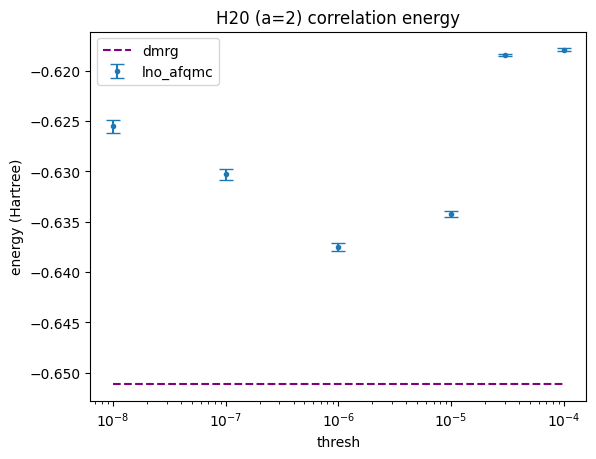

In [11]:
plt.errorbar(
    thresh4,lno_afqmc4,yerr=lno_afqmc_err4,fmt='.',capsize=5,label='lno_afqmc')
x = np.linspace(min(thresh4),max(thresh4),100)
# plt.fill_between(
#     x, afqmc_e-e_mf+afqmc_err,afqmc_e-e_mf-afqmc_err, color='blue', alpha=0.2,label='ref_afqmc')
# plt.plot(x,[ccsd_t_corr]*100,'--',color='black',label='ccsd(t)_corr')
plt.plot(x,[dmrg4]*100,'--',color='purple',label='dmrg')
plt.xlabel('thresh')
plt.xscale('log')
plt.ylabel('energy (Hartree)')
plt.title('H20 (a=2) correlation energy')
plt.legend()
plt.show()

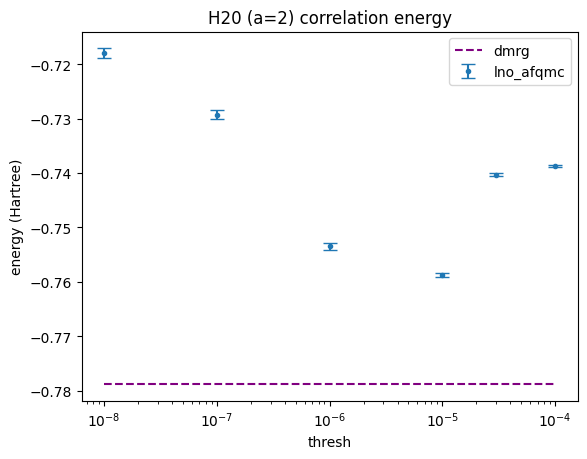

In [10]:
plt.errorbar(
    thresh5,lno_afqmc5,yerr=lno_afqmc_err5,fmt='.',capsize=5,label='lno_afqmc')
x = np.linspace(min(thresh5),max(thresh5),100)
# plt.fill_between(
#     x, afqmc_e-e_mf+afqmc_err,afqmc_e-e_mf-afqmc_err, color='blue', alpha=0.2,label='ref_afqmc')
# plt.plot(x,[ccsd_t_corr]*100,'--',color='black',label='ccsd(t)_corr')
plt.plot(x,[dmrg5]*100,'--',color='purple',label='dmrg')
plt.xlabel('thresh')
plt.xscale('log')
plt.ylabel('energy (Hartree)')
plt.title('H20 (a=2) correlation energy')
plt.legend()
plt.show()

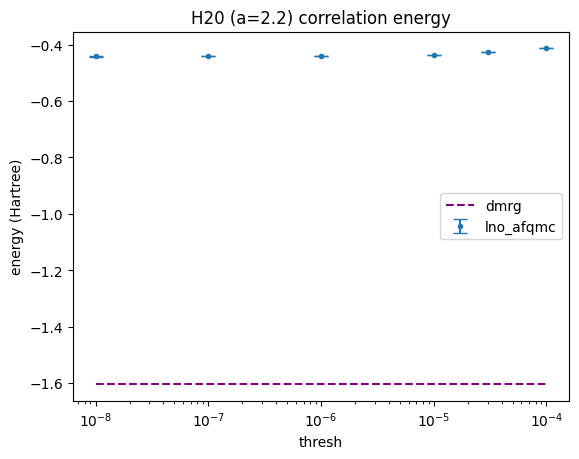

In [9]:
plt.errorbar(
    thresh2,lno_afqmc2,yerr=lno_afqmc_err2,fmt='.',capsize=5,label='lno_afqmc')
x = np.linspace(min(thresh2),max(thresh2),100)
# plt.fill_between(
#     x, afqmc_e-e_mf+afqmc_err,afqmc_e-e_mf-afqmc_err, color='blue', alpha=0.2,label='ref_afqmc')
# plt.plot(x,[ccsd_t_corr]*100,'--',color='black',label='ccsd(t)_corr')
plt.plot(x,[dmrg2]*100,'--',color='purple',label='dmrg')
plt.xlabel('thresh')
plt.xscale('log')
plt.ylabel('energy (Hartree)')
plt.title('H20 (a=2.2) correlation energy')
plt.legend()
plt.show()

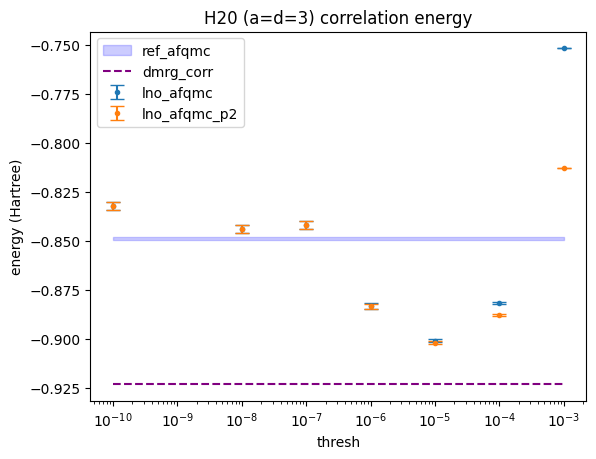

In [3]:
plt.errorbar(
    lno_thresh,lno_qmc_cc_corr,yerr=lno_qmc_cc_err,fmt='.',capsize=5,label='lno_afqmc')
plt.errorbar(
    lno_thresh,lno_qmc_cc_corr+mp2_cr,yerr=lno_qmc_cc_err,fmt='.',capsize=5,label='lno_afqmc_p2')
# plt.plot(
#     lno_thresh,lno_ccsd_corr,'^',label='lno_ccsd')
x = np.linspace(min(lno_thresh),max(lno_thresh),100)
plt.fill_between(
    x, afqmc_e-e_mf+afqmc_err,afqmc_e-e_mf-afqmc_err, color='blue', alpha=0.2,label='ref_afqmc')
# plt.plot(x,[ccsd_corr]*100,'--',color='grey',label='ccsd_corr')
# plt.plot(x,[ccsd_t_corr]*100,'--',color='black',label='ccsd(t)_corr')
plt.plot(x,[e_dmrg-e_mf]*100,'--',color='purple',label='dmrg_corr')
plt.xlabel('thresh')
plt.xscale('log')
plt.ylabel('energy (Hartree)')
plt.title('H20 (a=d=3) correlation energy')
plt.legend()
plt.show()